# Data Visualization Project on "Impact of Covid-19 on Digital Learning using"
* Python libraries: Matplot Lib,Word Cloud,seaborn,folium,heatmap
* Tableau, Power BI tools (check the PDF file)

Deep dive into Analysis on inequality in accessing the digital education due to Impact of Covid-19 and providing the solutions to reduce the gap called (Digital Divide).


In [4]:
# Import related libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, glob
import plotly.express as px
# from fontTools.misc.symfont import y
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

import os
for dirname, _, filenames in os.walk('/Users/mohammedmutaharshaik/Desktop/ImpactofCovid19_OnDigitalLearning/resources'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/mohammedmutaharshaik/Desktop/ImpactofCovid19_OnDigitalLearning/resources/income.csv
/Users/mohammedmutaharshaik/Desktop/ImpactofCovid19_OnDigitalLearning/resources/.DS_Store
/Users/mohammedmutaharshaik/Desktop/ImpactofCovid19_OnDigitalLearning/resources/products_info.csv
/Users/mohammedmutaharshaik/Desktop/ImpactofCovid19_OnDigitalLearning/resources/districts_info.csv
/Users/mohammedmutaharshaik/Desktop/ImpactofCovid19_OnDigitalLearning/resources/engagementData/3188.csv
/Users/mohammedmutaharshaik/Desktop/ImpactofCovid19_OnDigitalLearning/resources/engagementData/7305.csv
/Users/mohammedmutaharshaik/Desktop/ImpactofCovid19_OnDigitalLearning/resources/engagementData/7675.csv
/Users/mohammedmutaharshaik/Desktop/ImpactofCovid19_OnDigitalLearning/resources/engagementData/1204.csv
/Users/mohammedmutaharshaik/Desktop/ImpactofCovid19_OnDigitalLearning/resources/engagementData/4591.csv
/Users/mohammedmutaharshaik/Desktop/ImpactofCovid19_OnDigitalLearning/resources/engagementData/6345.cs

In [5]:
# Load products_info data file
product_info = pd.read_csv(r'/Users/mohammedmutaharshaik/Desktop/ImpactofCovid19_OnDigitalLearning/resources/products_info.csv')
product_info.head()

,lp_id,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [6]:
# Load districts_info data file
districts_info = pd.read_csv(r'/Users/mohammedmutaharshaik/Desktop/ImpactofCovid19_OnDigitalLearning/Resources/districts_info.csv')
districts_info.head()

districts_info['pct_black/hispanic']=districts_info['pct_black/hispanic'].astype('str')
districts_info['pct_free/reduced']=districts_info['pct_free/reduced'].astype('str')
districts_info['county_connections_ratio']=districts_info['county_connections_ratio'].astype('str')
districts_info['pp_total_raw']=districts_info['pp_total_raw'].astype('str')
# 'pct_free/reduced','county_connections_ratio','pp_total_raw'

### Cleaning the raw data and converting in to percentage and ranges in the datasets

In [7]:
mapping_1 = {
    '[0, 0.2[': '0%-20%',
    '[0.2, 0.4[': '20%-40%',
    '[0.4, 0.6[': '40%-60%',
    '[0.6, 0.8[': '60%-80%',
    '[0.8, 1[': '80%-100%'}

mapping_2 = {
    '[4000, 6000[': '4000-6000',
    '[6000, 8000[': '6000-8000',
    '[8000, 10000[': '8000-10000',
    '[10000, 12000[': '10000-12000',
    '[12000, 14000[': '12000-14000',
    '[14000, 16000[': '14000-16000',
    '[16000, 18000[': '16000-18000',
    '[18000, 20000[': '18000-20000',
    '[20000, 22000[': '20000-22000',
    '[22000, 24000[': '22000-24000',
    '[32000, 34000[': '32000-34000'}

mapping_3 =mapping_3 = {
    '[0.18, 1[': '18%-100%',
    '[1, 2[': '100%-200%'
}
districts_info['pct_black/hispanic'] = districts_info['pct_black/hispanic'].map(mapping_1)
districts_info['pct_free/reduced'] = districts_info['pct_free/reduced'].map(mapping_1)
districts_info['county_connections_ratio'] = districts_info['county_connections_ratio'].map(mapping_3)
districts_info['pp_total_raw'] = districts_info['pp_total_raw'].map(mapping_2)
districts_info

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,0%-20%,20%-40%,18%-100%,6000-8000
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
228,9515,New York,Rural,0%-20%,40%-60%,18%-100%,18000-20000
229,8103,Tennessee,Rural,20%-40%,NaN,18%-100%,8000-10000
230,4929,Virginia,Rural,0%-20%,40%-60%,18%-100%,12000-14000
231,7975,California,City,60%-80%,60%-80%,18%-100%,NaN


In [8]:
engagement_merged=pd.DataFrame()
address = glob.glob('/Users/mohammedmutaharshaik/Desktop/ImpactofCovid19_OnDigitalLearning/resources/engagementData/*.csv')
count=0
for i in address:
    with open(i, "rb") as data_of_files:
        data=pd.read_csv(data_of_files)
        engagement_merged=pd.concat([engagement_merged,data], axis=0)
        count=count+1
        if count==233:
            break
engagement_merged

,time,lp_id,pct_access,engagement_index
0,2020-01-01,29322.0,0.04,1.30
1,2020-01-01,57084.0,0.04,0.43
2,2020-01-01,99916.0,0.09,5.20
3,2020-01-01,58235.0,0.00,NaN
4,2020-01-01,11585.0,0.04,1.30
...,...,...,...,...
36572,2020-12-31,47364.0,0.30,82.44
36573,2020-12-31,98102.0,0.00,NaN
36574,2020-12-31,72468.0,0.00,NaN
36575,2020-12-31,65277.0,0.00,NaN


### Main Observations:

Engagement Data

Number of rows 22324190 and Number of columns 4
The missing value in Engagement Data is 5392397 mainly come from engagement_index 5378409 (24% from total observation), lp_id 541, pct_access 13447.
Districts Data

Number of rows 233 and Number of columns 7
The missing value in Districts Data is 590 mainly come from pct_free/reduced 233, county_connections_ratio 71, pp_total_raw 115
Products Data

Number of rows 372 and Number of columns 8
The number of missing values 81 mainly comes from Provider/Company Name 1, Sector(s) 20, Primary Essential Function 20

In [11]:
print('The shape of engagement_merged data:', engagement_merged.shape) # check the rows and columns of this dataset
print('---------')
print('Data type: ')
print(engagement_merged.dtypes)   # check datatypes to see if there are some wrongly categorized type
print('---------')
print('Null data: ')
print(engagement_merged.isnull().sum())   # check each columns number of null values
print('---------')
print('The number of unique in data: ')
print(engagement_merged.nunique()) # check each columns number of unique values


The shape of engagement_merged data: (22324190, 4)
---------
Data type: 
time                 object
lp_id               float64
pct_access          float64
engagement_index    float64
dtype: object
---------
Null data: 
time                      0
lp_id                   541
pct_access            13447
engagement_index    5378409
dtype: int64
---------
The number of unique in data: 
time                   366
lp_id                 8646
pct_access            8232
engagement_index    372537
dtype: int64


In [12]:
product_info[product_info['Provider/Company Name'].isnull()]
product_info[product_info['Sector(s)'].isnull()]
# # We see that NaN in this case maybe useful for analyze because their products name are quite popular and their sector used not clearly to label so I will keep it and instead label NaN, I replace columns (Sector, Primary Essential Function) contain NaN by 'flexible' respectively
# Additionally, URL columns may not useful so I will remove it for convinience

,lp_id,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
61,33562,http://www.ixl.com/,IXL Language,IXL Learning,NaN,NaN
146,83394,https://www.yelp.com/,Yelp,"Yelp, Inc",NaN,NaN
158,63178,http://www.learnplatform.com/,LearnPlatform,Lea(R)n,NaN,NaN
174,32340,http://genius.com/static/education,Education Genius,Genius Media Group,NaN,NaN
183,85991,http://www.microsoft.com/en-us/education/produ...,Microsoft Office 365,Microsoft,NaN,NaN
210,37891,http://www.classzone.com/cz/index.htm,ClassZone,Houghton Mifflin Harcourt,NaN,NaN
237,45716,http://student.classdojo.com/#/login,ClassDojo for Students,"ClassDojo, Inc.",NaN,NaN
248,53775,https://play.google.com/music/listen?u=0#/sulp,Google Play Music,Google LLC,NaN,NaN
262,45811,https://sciencejournal.withgoogle.com/,Google Science Journal,Google LLC,NaN,NaN
265,84099,https://edutrainingcenter.withgoogle.com/,Google Training Center,Google LLC,NaN,NaN


In [14]:
product_info.fillna({'Sector(s)':'flexible','Primary Essential Function':'flexible','Provider/Company Name':'unknown'},inplace=True) #fill na values
# product_info.drop(columns=['URL'],inplace=True) # drop uneccesary column
product_info.rename(columns={'LP ID':'lp_id','Product Name':'product_name'
    ,'Provider/Company Name':'provider/company_name'
    ,'Sector(s)':'sector','Primary Essential Function':'primary_essential_function'}, inplace=True) # rename column for conviniently handling
product_info.isnull().sum().any()  #check null again

False

In [15]:
%%HTML
<iframe width="750" height="520" frameborder="0" src="https://usafacts.org/articles/65-of-childrens-education-has-moved-online-during-covid-19/embed/0/?"></iframe>
<iframe width="750" height="520" frameborder="0" src="https://usafacts.org/embed/chart/?autosize=false&axisTextColor=%23616161&chartType=1&margins=%7B%22top%22%3A0%7D&metrics=%5B%7B%22id%22%3A%22sotu2151%22%2C%22allStates%22%3Atrue%7D%5D&selectableYears=false&sortRows=false&source=SOTU&title=Percentage%20of%20households%20with%20children%20reporting%20use%20of%20online%20distance%20learning%3A"></iframe>

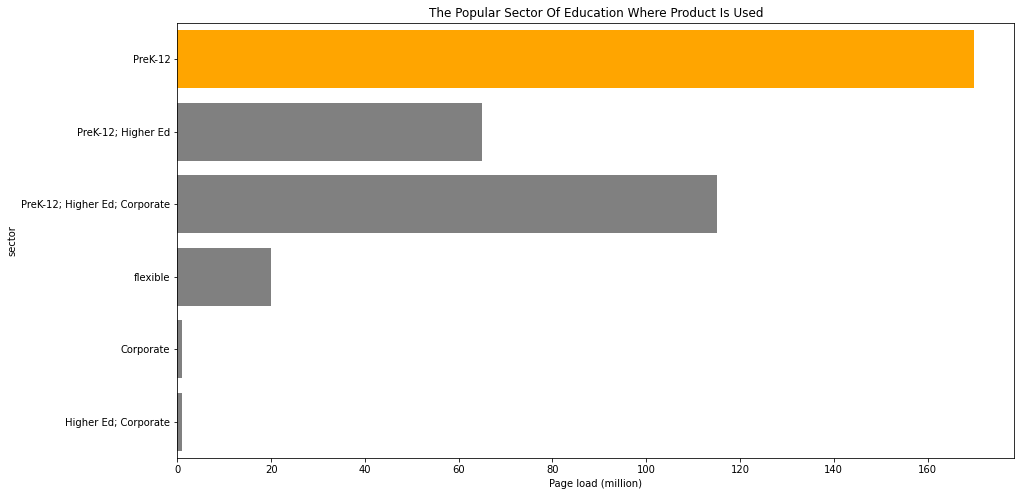

In [16]:
# plot the popular sector of eduction where product is used
plt.figure(figsize = (15,8))
ax = sns.countplot(data = product_info,  y = 'sector', color='grey')
ax.set_ylabel('sector')
ax.set_xlabel('Page load (million)')
ax.set_title('The Popular Sector Of Education Where Product Is Used')
patch_h = []
for patch in ax.patches:
    reading = patch.get_height()
    patch_h.append(reading)
# patch_h contains the heights of all the patches now
idx_tallest = np.argmax(patch_h)
# np.argmax return the index of largest value of the list
ax.patches[idx_tallest].set_facecolor('Orange')

Text(0.5, 1.0, 'Top Provider/Company Have A Variety Of Products')

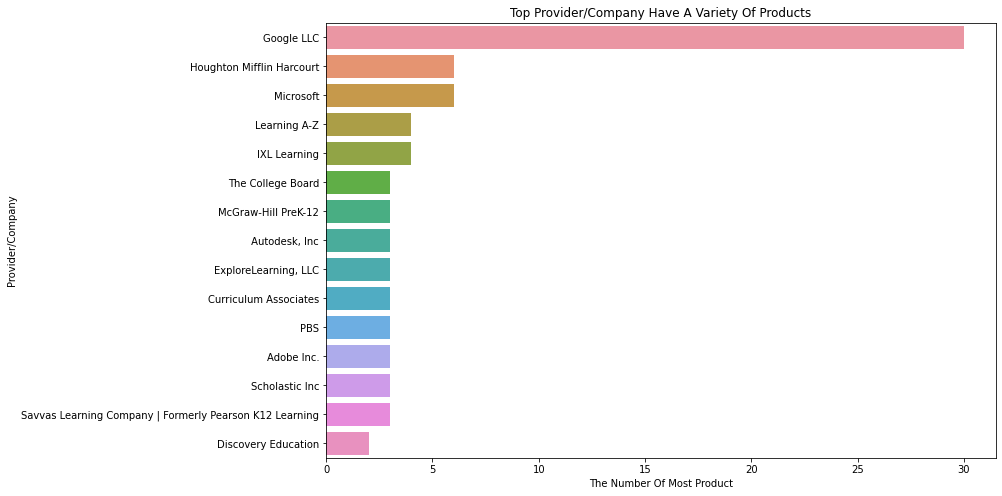

In [17]:
# plot top provider/company which have the most a variety of products
plt.figure(figsize=(12,8))
ax = sns.barplot(data =product_info['provider/company_name'].value_counts().sort_values(ascending=False).to_frame().reset_index().head(15), x='provider/company_name', y = 'index')
ax.set_xlabel('The Number Of Most Product')
ax.set_ylabel('Provider/Company')
ax.set_title('Top Provider/Company Have A Variety Of Products')

Text(0, 0.5, 'primary_essential_function')

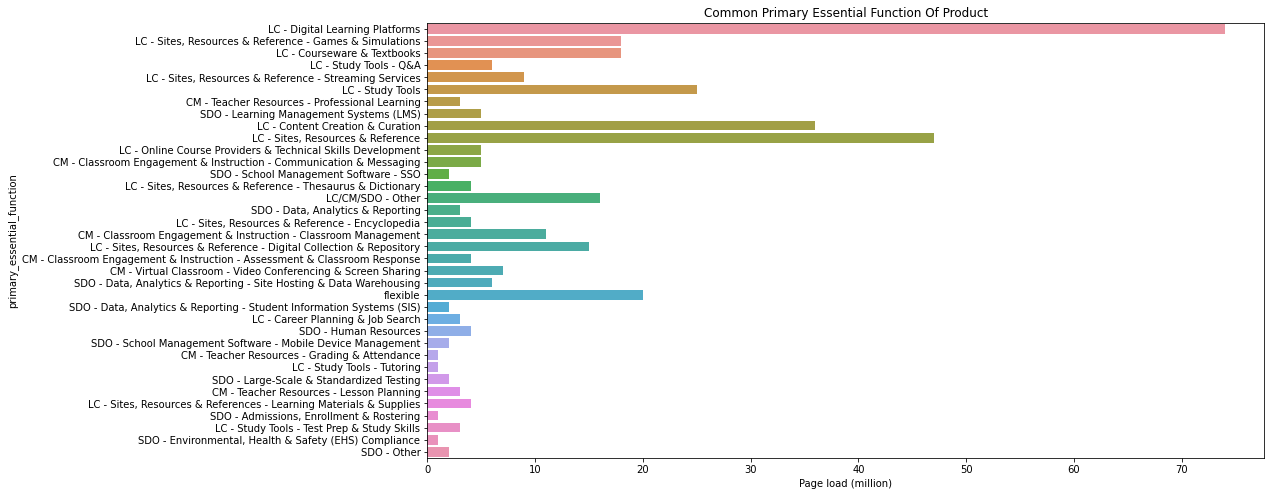

In [18]:
# plot common primary essential function of product
plt.figure(figsize=(15,8))
ax = sns.countplot(data=product_info, y = 'primary_essential_function')
ax.set_title('Common Primary Essential Function Of Product')
ax.set_xlabel('Page load (million)')
ax.set_ylabel('primary_essential_function')

PreK-12


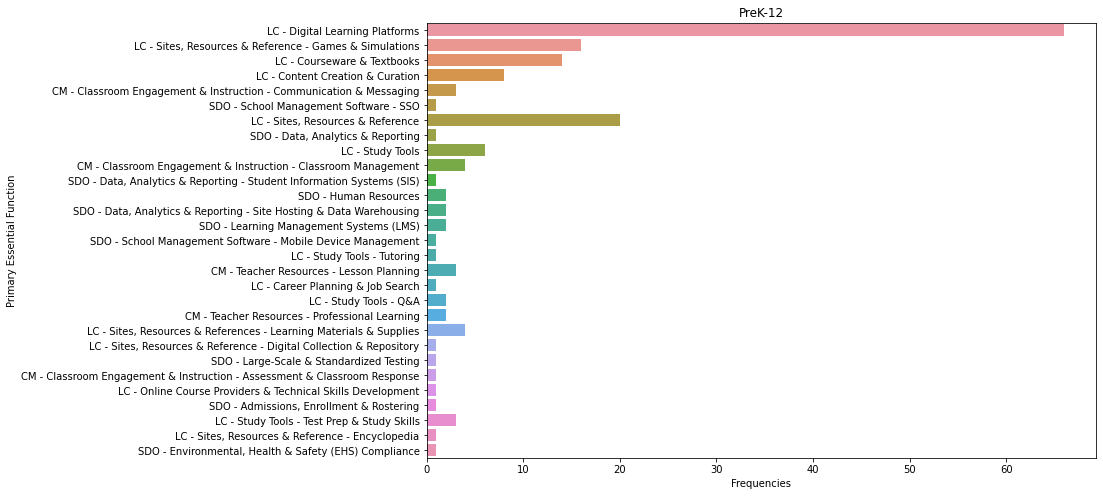

PreK-12; Higher Ed


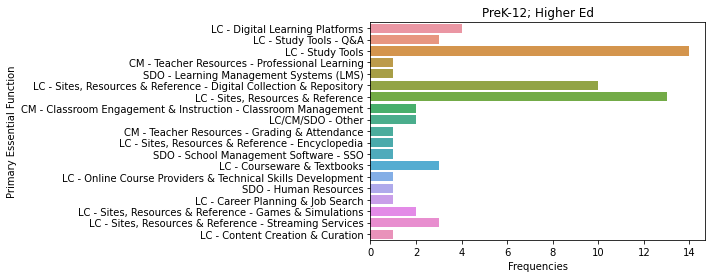

PreK-12; Higher Ed; Corporate


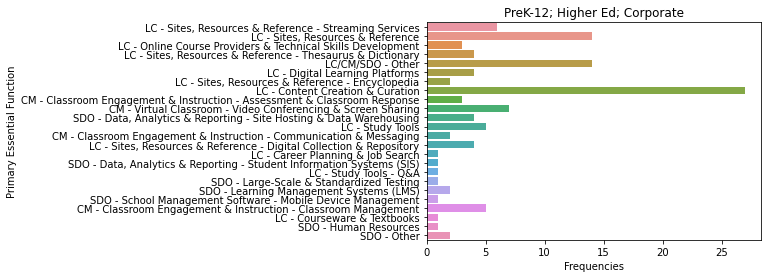

In [19]:
plt.figure(figsize=(12,8))
# print(product_info['sector'].unique()[0:3])
for x in (product_info['sector'].unique()[0:3]):
    print(x)
    ax = sns.countplot(data = product_info[product_info['sector'] == str(x)], y='primary_essential_function')
    ax.set_title(str(x))
    ax.set_xlabel('Frequencies')
    ax.set_ylabel('Primary Essential Function')
    plt.show()

In [20]:
districts_info['district_id']=districts_info['district_id'].astype('int64')
product_info[['Category','Sub-Category']]=product_info['primary_essential_function'].str.split('-',n=1,expand=True)

product_info.head()

,lp_id,URL,product_name,provider/company_name,sector,primary_essential_function,Category,Sub-Category
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si...",LC,"Sites, Resources & Reference - Games & Simula..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms


In [21]:
df_copy = engagement_merged.copy()
product_merge_available = pd.merge(df_copy, product_info[['lp_id', 'product_name']], on = 'lp_id')
def top_product_available(interest, method_wanted, amount):
    top_product = product_merge_available.groupby(['product_name'])[str(interest)].agg(method_wanted).sort_values(ascending=False).head(amount).reset_index()

    primary_func = []
    for name in (top_product['product_name'].values):
        d = product_info[product_info['product_name']==name]['primary_essential_function'].values[0]
        d = d.split('- ',1)[-1]
        primary_func.append(d)

    from wordcloud import WordCloud
    fig = plt.figure(figsize=(15,10))
    fig.add_subplot(121)
    wordcloud = WordCloud (
        background_color = 'black',
        width = 812,
        height = 684
    ).generate(' '.join((top_product['product_name'].values)))
    plt.imshow(wordcloud) # image show
    plt.axis('off') # to off the axis of x and y

    fig.add_subplot(122)
    wordcloud = WordCloud (
        background_color = 'black',
        width = 812,
        height = 684
    ).generate(' '.join(primary_func))
    plt.imshow(wordcloud) # image show
    plt.axis('off') # to off the axis of x and y
    return (top_product['product_name'].values), plt.show()


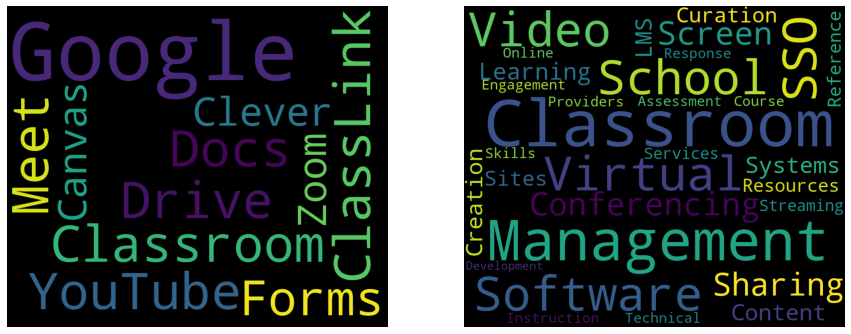

In [22]:
list_product = top_product_available('pct_access', np.mean, 10) # plot popular product and assign list top 10 products used by mostly student

In [23]:
engagement_merged['page_load_per_student'] = engagement_merged['engagement_index'] / 1000 # add columns page load per student
result = pd.concat([engagement_merged, districts_info[['district_id','state','locale','pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw']]],axis=1)
result

,time,lp_id,pct_access,engagement_index,page_load_per_student,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,2020-01-01,29322.0,0.04,1.30,0.00130,8815.0,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000
1,2020-01-01,57084.0,0.04,0.43,0.00043,2685.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,99916.0,0.09,5.20,0.00520,4921.0,Utah,Suburb,0%-20%,20%-40%,18%-100%,6000-8000
3,2020-01-01,58235.0,0.00,NaN,NaN,3188.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,11585.0,0.04,1.30,0.00130,2238.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
36572,2020-12-31,47364.0,0.30,82.44,0.08244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36573,2020-12-31,98102.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36574,2020-12-31,72468.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36575,2020-12-31,65277.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

Text(0.5, 1.0, 'Distribution of school districts by locale')

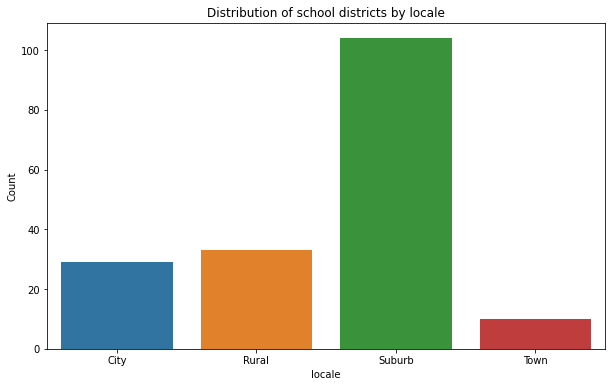

In [25]:
# plot distribution the number of school district by locale
district_amount = {}
for locale in ["City", "Rural", "Suburb", "Town"]:
    district_amount[locale] = result[result['locale'] == locale]["district_id"].nunique()
dis_amount_df = pd.DataFrame.from_dict(district_amount, orient='index', columns=['Count']).reset_index().rename(columns = {'index':'locale'})
plt.figure(figsize=(10,6))
ax = sns.barplot(data=dis_amount_df, x = 'locale', y='Count')
ax.set_title("Distribution of school districts by locale")
# show_values(g4, "h", space=0)

Text(0.5, 1.0, 'The Number Of School District In Each State')

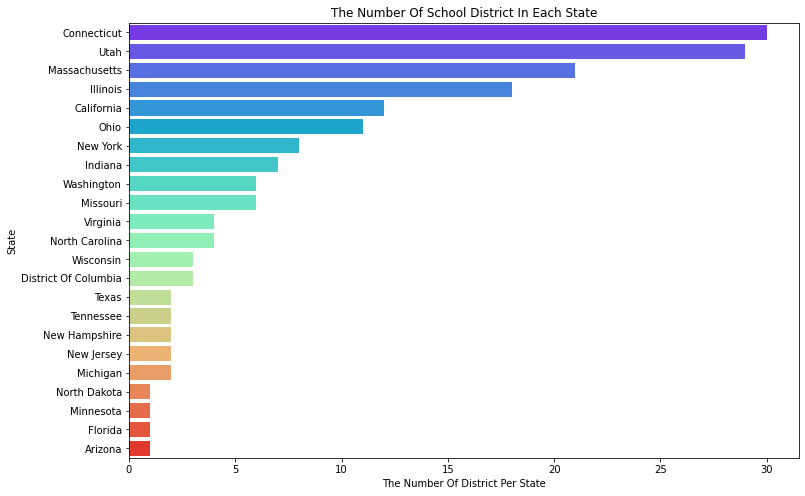

In [26]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = pd.DataFrame(districts_info.groupby(['state'])['district_id'].count().sort_values(ascending=False)).reset_index() , y = 'state', x = 'district_id', palette='rainbow')
ax.set_xlabel('The Number Of District Per State')
ax.set_ylabel('State')
ax.set_title('The Number Of School District In Each State')

In [27]:
# sort descending product_id with highest pct_access to lowest
max_user_access = result.groupby(['lp_id'])['pct_access'].agg(np.max).sort_values(ascending = False).to_frame().reset_index()
# we merge column lp_id, pct_access, product_name together to make a new dataframe
product_access = pd.merge(engagement_merged[['time','lp_id', 'pct_access','engagement_index']],product_info[['lp_id', 'product_name']], on = 'lp_id')
product_access = product_access.sort_values(['time'])
product_access = product_access.reset_index().drop(columns = ['index','lp_id'])

In [28]:
# function return product name with given product ID
def id_product_name(list_product_considered):
    most_access = (list_product_considered)
    name = {}
    for x in most_access:
        if (product_info['product_name']==x).any().sum():
            n = product_info[product_info['product_name']==x]['lp_id'].values[0]
            name[n] = x
        else:
            return 'Not found'
    return name

# function plot pct_access, engagement_index or page_load_per_student over time given a product in given a district
def plot_interest_by_product(interest, id_product, district_id):
    fig = px.line(result[(result['lp_id']==id_product) & (result['district_id']==district_id)], x='time', y=str(interest),
                  title='Pecentages Of Student In District Have At Least 1 Page Load Of '+ str(id_product))
    return fig.show()



## function return number of product max access in given time (calulated by mean pct_access or engagement_index)
def max_product_interest(interest, amount): # amount is the number of rank_max expected
    c = [str(x+1)+'st Max' for x in range(amount)]
    pivot_df = product_access.groupby(['time','product_name'])[str(interest)].agg(np.mean).unstack().reset_index()
    df = (pivot_df.set_index('time')
          .apply(lambda x: pd.Series(x.nlargest(amount).index, index=c), axis=1)  # return n product_name has largest mean pct_access over The US in given time
          .reset_index())
    return df


#function plot mean daily page_load_per_student by state and product_name
def mean_daily_pageload_or_access(list_id_product, group_by, interest): # group_by is state or product_name (choose one out of them)
    temp = result[result['lp_id'].isin(list_id_product)]
    temp = pd.merge(temp, product_info[['lp_id', 'product_name']], on = 'lp_id')
    temp =  temp.groupby([str(group_by)])[str(interest)].agg(np.mean).to_frame().reset_index().sort_values(by = str(interest),ascending = False)
    plt.figure(figsize=(10,6))
    if str(group_by) == 'product_name':
        ax = sns.barplot(data = temp, y = str(group_by), x = str(interest), color='orange')
        ax.set_xlabel('Mean Daily '+str(interest))
        ax.set_title('Mean Daily '+str(interest) +' In Top '+ str(len(temp)) +' Products In The US')
        ax.set_ylabel('Product Name')
    elif str(group_by) == 'state':
        clrs = [sns.color_palette("Set2")[4] if (x < temp[str(interest)].mean()) else sns.color_palette("Set2")[1] for x in temp[str(interest)]] # set bars chart smaller than mean are green, else orange
        ax = sns.barplot(data = temp, y = 'state', x = str(interest), palette=clrs)
        ax.axvline(temp[str(interest)].mean(), color='b', linestyle='--', label="Mean") # set mean line
        ax.set_title('Mean Daily  '+ str(interest)+' '+ str(len(list_id_product)) +' Given Products Per Student By State')
        ax.set_xlabel('Mean Daily '+str(interest))
        ax.set_ylabel('State')
    else:
        return 'Not match! Please retype one of the following: product_name or state'
    return plt.show()

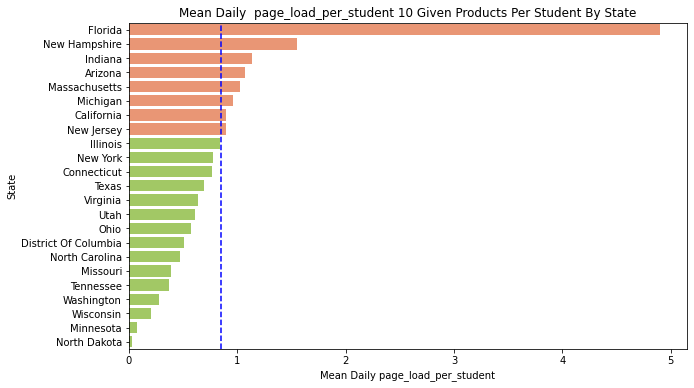

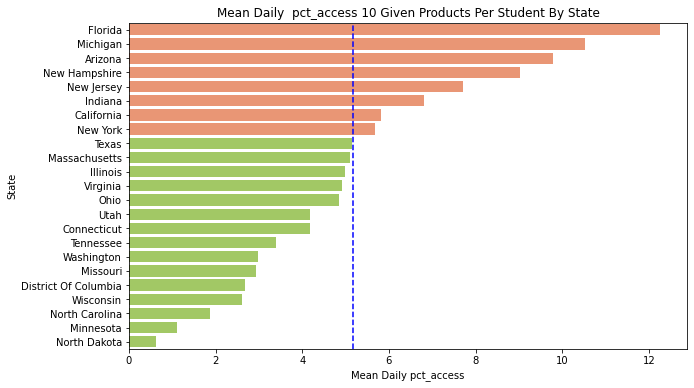

In [29]:
top_10products_id = id_product_name(list_product[0]) # top 10 products considered
mean_daily_pageload_or_access(top_10products_id,'state', 'page_load_per_student') # page_load_per_student
mean_daily_pageload_or_access(top_10products_id, 'state','pct_access') # pct_access

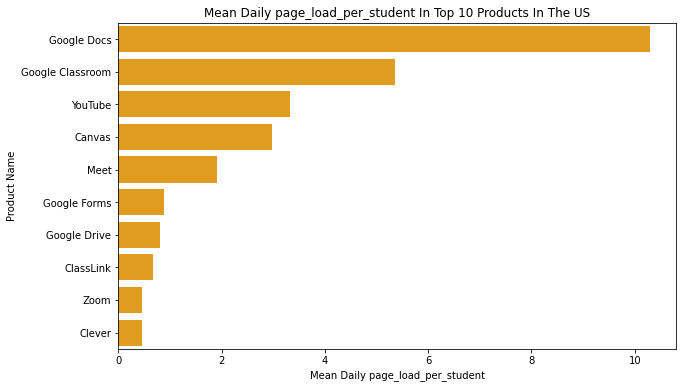

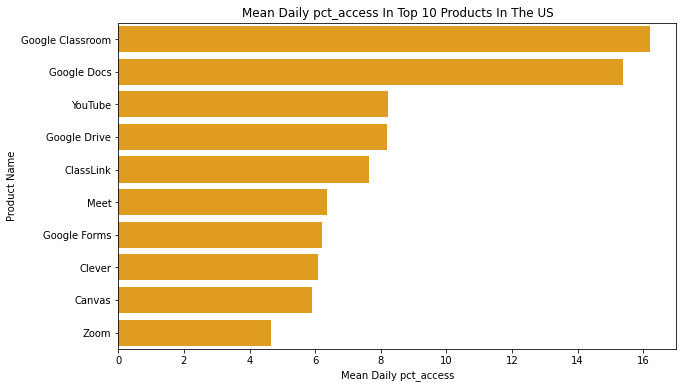

In [30]:
mean_daily_pageload_or_access(top_10products_id, 'product_name', 'page_load_per_student') # page_load_per_student
mean_daily_pageload_or_access(top_10products_id, 'product_name', 'pct_access') # pct_access

In [31]:
# function plot the change or difference of chosen products by all state exist in recorded dataset
def plot_product_pageload_change_by_state(list_id_product):
    temp = result[result['lp_id'].isin(list_id_product)]
    temp = pd.merge(temp, product_info[['lp_id', 'product_name']], on = 'lp_id')
    temp = temp.groupby(['product_name','state'])['page_load_per_student'].agg(np.mean).to_frame().reset_index().sort_values(by = 'page_load_per_student',ascending = False)
    state_l = (temp['state'].unique())
    # dynamic subplot layout
    num_plots = len(state_l)
    total_cols = 3
    total_rows = num_plots//total_cols + 1
    fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                            figsize=(5*total_cols, 5*total_rows), constrained_layout=True)
    for i, var in enumerate(state_l):
        row = i//total_cols
        pos = i % total_cols
        plot = sns.barplot(data=temp[temp['state'] == state_l[i]], y='product_name', x = 'page_load_per_student', color='lightgreen', ax=axs[row][pos])
        plot.title.set_text(str(state_l[i]))

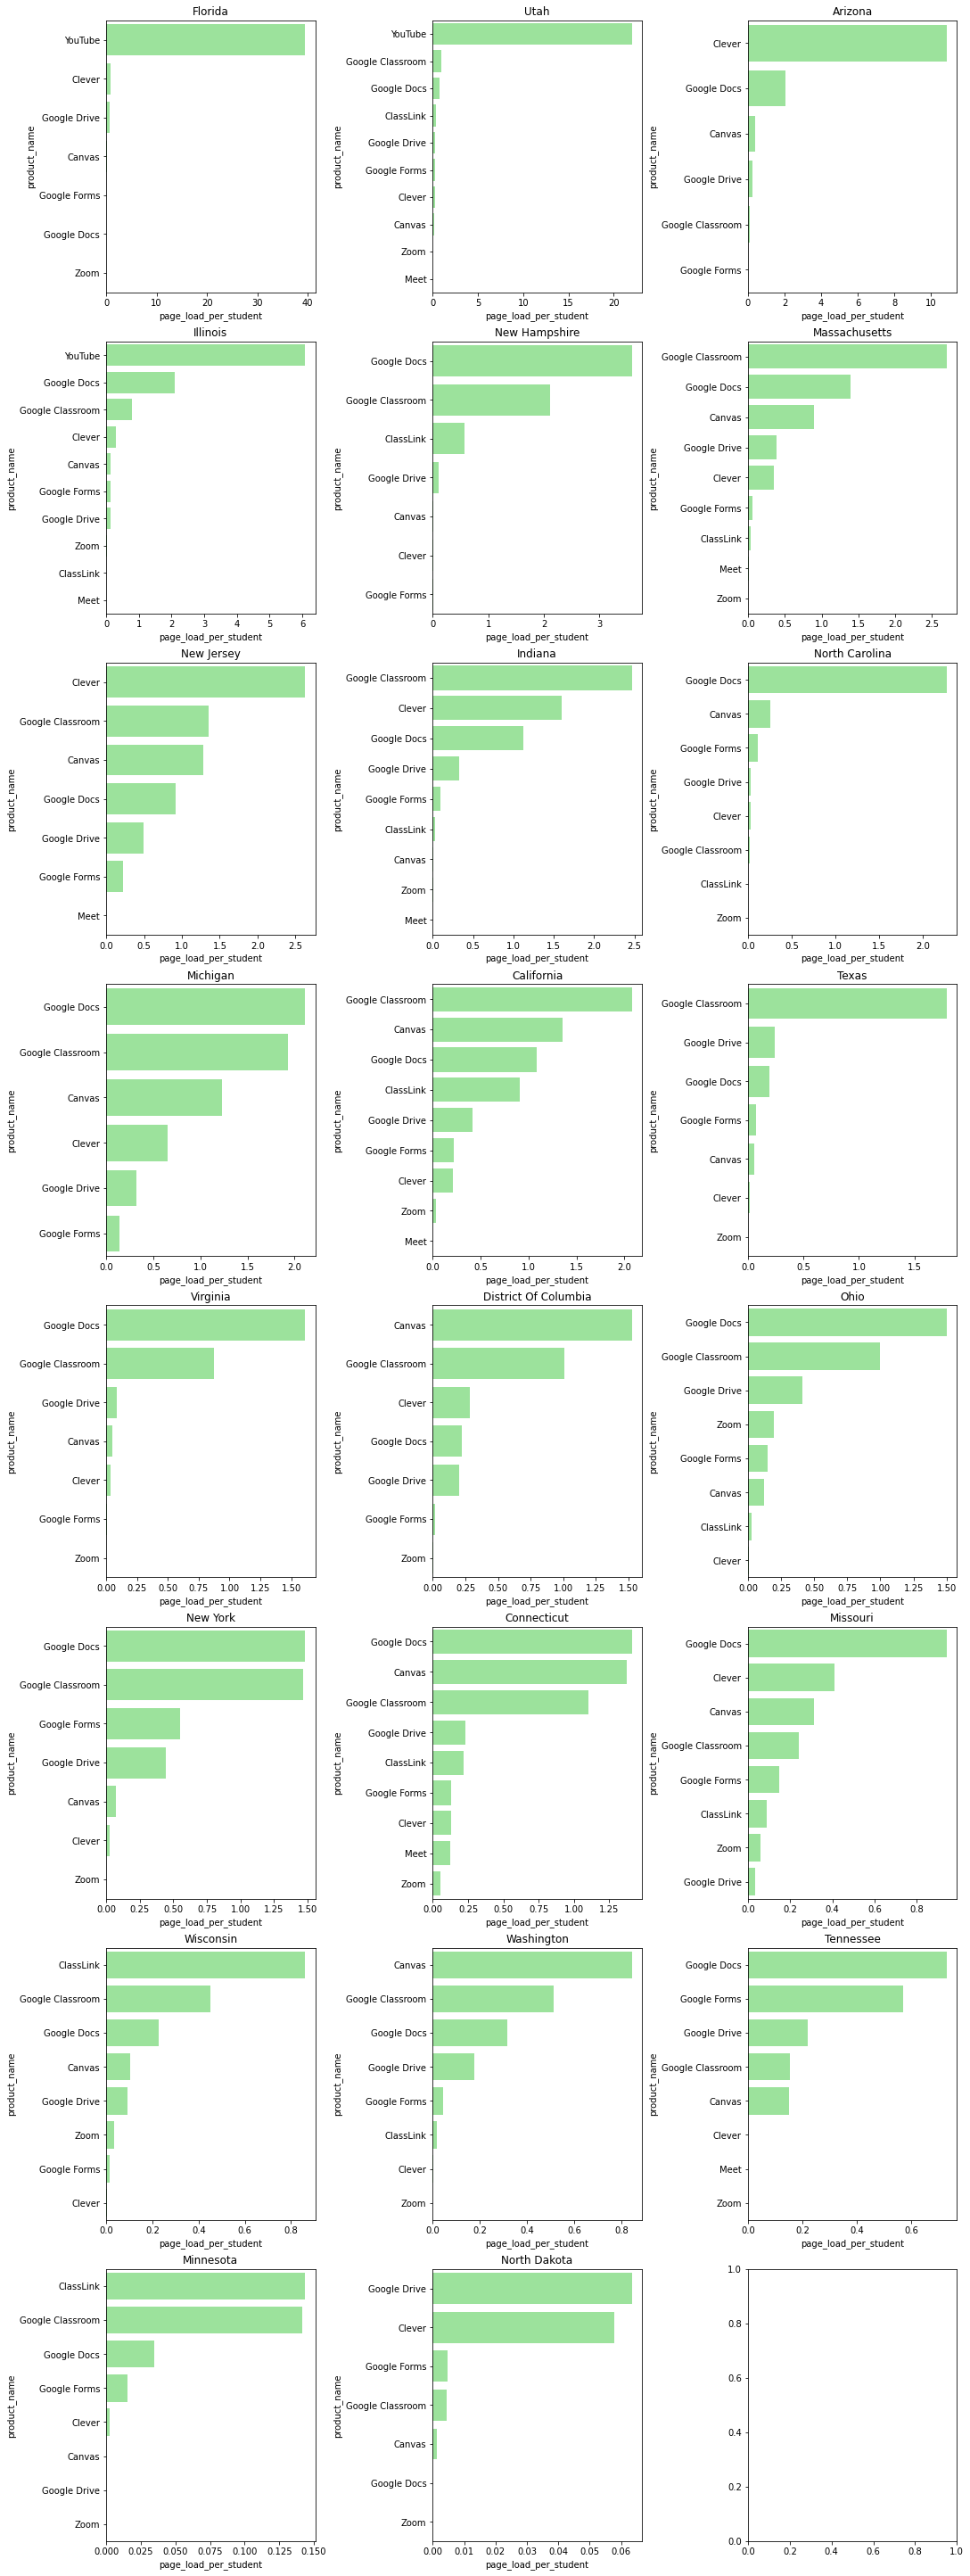

In [32]:
plot_product_pageload_change_by_state(top_10products_id) # plot top 10 product most popular

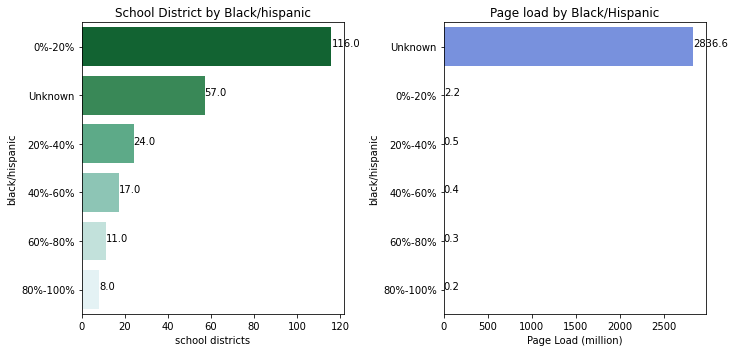

In [33]:
#School District by Black/hispanic
black_hispanic_temp=pd.DataFrame(result.groupby('pct_black/hispanic',dropna=False)['district_id'].nunique()).reset_index()
black_hispanic_temp.columns=['black/hispanic','Amount']
black_hispanic_temp=black_hispanic_temp.sort_values('Amount',ascending=False)
black_hispanic_temp=black_hispanic_temp.fillna('Unknown')
#plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
g5=sns.barplot(x=black_hispanic_temp['Amount'],y=black_hispanic_temp['black/hispanic'],orient='h',palette='BuGn_r')
plt.ylabel('black/hispanic')
plt.xlabel('school districts')
plt.title('School District by Black/hispanic')
plt.tight_layout()
show_values(g5, "h", space=0)

#Page load by hispanic/Black
black_hispanic_temp=pd.DataFrame(result.groupby('pct_black/hispanic',dropna=False)['engagement_index'].sum()/1000000).reset_index()
black_hispanic_temp.columns=['black/hispanic','Amount']
black_hispanic_temp=black_hispanic_temp.sort_values('Amount',ascending=False)
black_hispanic_temp=black_hispanic_temp.fillna('Unknown')
#plot
plt.subplot(1,2,2)
g6=sns.barplot(x=black_hispanic_temp['Amount'],y=black_hispanic_temp['black/hispanic'],orient='h',palette='coolwarm')
plt.ylabel('black/hispanic')
plt.xlabel('Page Load (million)')
plt.title('Page load by Black/Hispanic')
plt.tight_layout()
show_values(g6, "h", space=0)




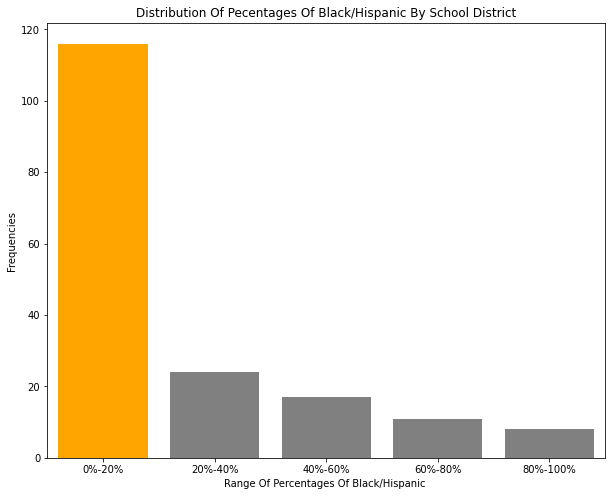

In [34]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=districts_info.sort_values(['pct_black/hispanic']).reset_index(drop=True), x='pct_black/hispanic', color='grey') # sort value
ax.set_title('Distribution Of Pecentages Of Black/Hispanic By School District')
ax.set_xlabel('Range Of Percentages Of Black/Hispanic ')
ax.set_ylabel('Frequencies')

# set orange color for the highest bar
patch_h = []
for patch in ax.patches:
    reading = patch.get_height()
    patch_h.append(reading)
# patch_h contains the heights of all the patches now
idx_tallest = np.argmax(patch_h)
# np.argmax return the index of largest value of the list
ax.patches[idx_tallest].set_facecolor('orange')

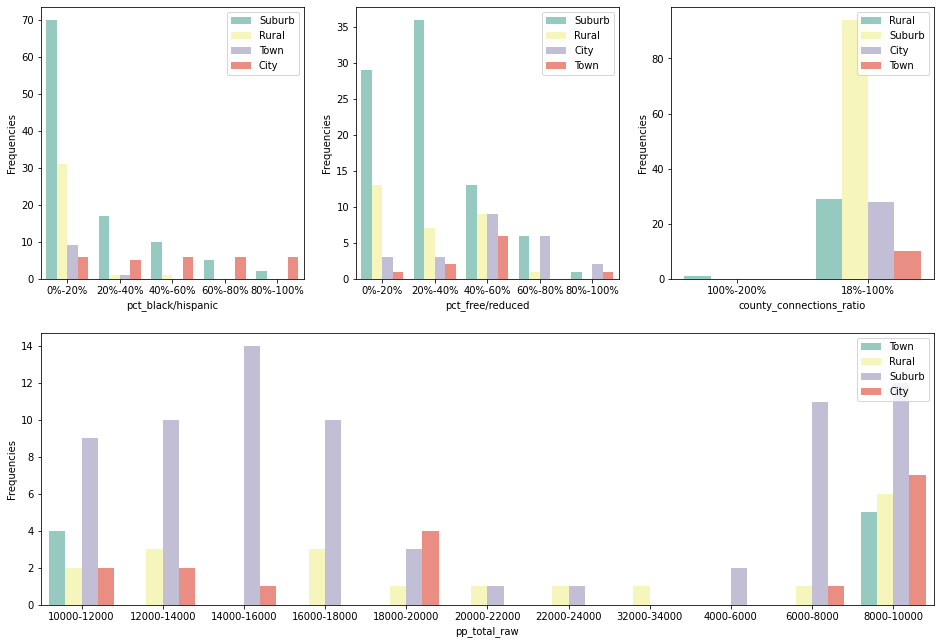

In [35]:
# plot multiple plot about pct_black/hispanic, pct_free/reduced, county_connections_ratio and pp_total_raw
X = [ (2,3,1),(2,3,2), (2,3,3),(2,1,2)]
columns = list(districts_info)[3:]
plt.figure(figsize=(16,11))
i = 0
for nrows, ncols, plot_number in X:
    name = columns[i]
    plt.subplot(nrows, ncols, plot_number)
    ax = sns.countplot(data=districts_info.sort_values([str(name)]).reset_index(drop=True), hue='locale', x=str(name), palette='Set3')
    ax.legend(loc='upper right')
    ax.set_ylabel('Frequencies')
    i = i+1

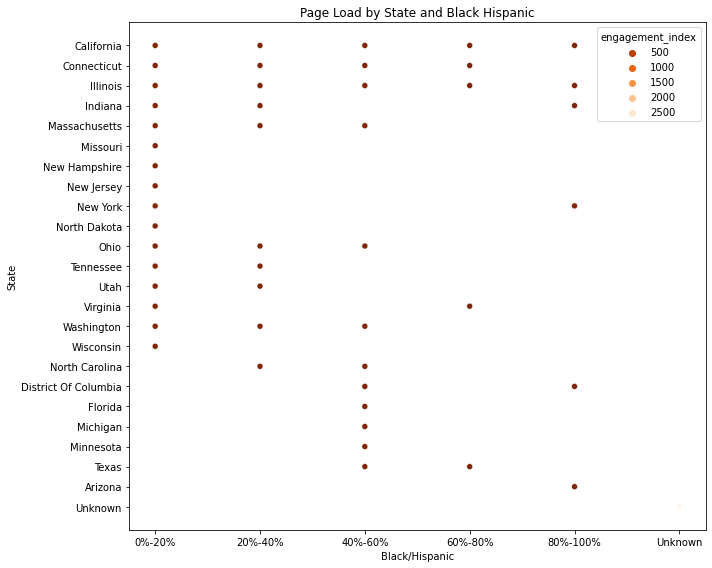

In [36]:
#School District by Black/hispanic
combine_temp=pd.DataFrame(result.groupby(['pct_black/hispanic','state'],dropna=False)['engagement_index'].sum()/1000000).reset_index()
combine_temp=combine_temp.fillna('Unknown')
#plot
plt.figure(figsize=(10,8))
g5=sns.scatterplot(x=combine_temp['pct_black/hispanic'],y=combine_temp['state'],hue=combine_temp['engagement_index'],palette='Oranges_r')
plt.xlabel('Black/Hispanic')
plt.ylabel('State')
plt.title('Page Load by State and Black Hispanic')
plt.tight_layout()

In [45]:
# plot_distribution_based_black_hispanic('pct_free/reduced')
# plot_distribution_based_black_hispanic('pp_total_raw')

###County Connection Ratio County Connection Ratio is residential fixed high-speed connections over 200 kbps in at least one direction/households.

North Dakhota has county connection 100%-200%
rest of the county has connection ratio 18%-100%

In [39]:
connection_ratio=pd.DataFrame(result.groupby(['county_connections_ratio'])['state'].nunique()).reset_index()
connection_ratio.columns=['county connections ratio','No of State']
connection_ratio=connection_ratio.fillna('unknown')
connection_ratio=connection_ratio.sort_values('No of State',ascending=False)
connection_ratio

,county connections ratio,No of State
1,18%-100%,22
0,100%-200%,1


In [40]:
nita_gov_data = pd.read_csv(r'/Users/mohammedmutaharshaik/Desktop/ImpactofCovid19_OnDigitalLearning/resources/income.csv')
#data set get on https://www.ntia.gov/files/ntia/publications/ntia-analyze-table_2020-05-15.csv

In [41]:
list = ['canUseElsewhereMainReason','noNeedInterestMainReason','noComputerMainReason','unavailableMainReason','privSecMainReason','tooExpensiveMainReason']
not_internet_reason = nita_gov_data[nita_gov_data['variable'].isin(list)][['dataset','usProp','description']] # extract data realated to main reason not internet
not_internet_reason['usProp'] = not_internet_reason['usProp']*100 #convert to percentage
not_internet_reason['description'] = not_internet_reason['description'].apply(lambda x:x.replace("Main Reason for Household Not Online at Home: ","")) # convert string for readable

In [42]:
import plotly.express as px
fig = px.line(not_internet_reason, x='dataset', y='usProp', color='description')
fig.update_layout(
    title="Main Reason For Not Having Access",
    xaxis_title="Time",
    yaxis_title="Percent",
    legend_title="Main Reason",
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="Black"
    )
)
fig.show()

### Correlation between Reduced Price and Per-Pupil Total expenditure interms of page-load

<AxesSubplot:xlabel='pct_free/reduced', ylabel='pp_total_raw'>

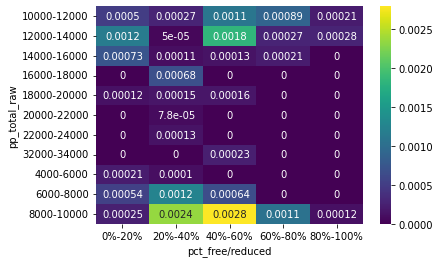

In [43]:
relation = pd.DataFrame(pd.pivot_table(result, index=['pp_total_raw','pct_free/reduced'], values='engagement_index', aggfunc='sum', dropna=False)).reset_index()
relation = result.pivot_table(index=['pp_total_raw'], columns='pct_free/reduced', values='engagement_index', aggfunc='sum', dropna=False)/100000000
relation=relation.fillna(0)
sns.heatmap(relation,annot=True,cmap='viridis')


In [44]:
# import folium
# !pip install folium
# from folium import Choropleth, Circle, Marker
# from folium.plugins import HeatMap, MarkerCluster
# north_america_map = folium.Map(location=[38.9, -77.05], tiles='Stamen Watercolor', zoom_start=3)
# north_america_map
#
# import math
# # mc = MarkerCluster()
# for idx, row in state_access.iterrows():
#     if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
#         popup = """
#         State : <b>%s</b><br>
#         Percentage Access : <b>%s</b><br>
#         """ % (row['state'], row['pct_access'])
#         mc.add_child(Marker([row['Latitude'], row['Longitude']],tooltip=popup))
#     north_america_map.add_child(mc)
# north_america_map